In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("personality_synthetic_dataset.csv")

# target and features
X = df.drop(columns=["personality_type"])
y = df["personality_type"]

# changing personality type into numebr labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(df.head())

  personality_type  social_energy  alone_time_preference  talkativeness  \
0        Extrovert       6.794295               3.854670       8.725446   
1         Ambivert       6.378988               5.731157       7.029529   
2         Ambivert       7.459421               6.322263       3.922269   
3        Extrovert       6.159626               3.097837       6.019093   
4        Introvert       5.568462               6.986722       3.913240   

   deep_reflection  group_comfort  party_liking  listening_skill   empathy  \
0         2.515151       7.097368      8.588762         6.774799  6.430132   
1         7.274493       4.111199      3.258248         5.550909  3.958179   
2         4.622261       5.343276      7.452152         9.483990  6.127654   
3         1.965440       7.837140     10.000000         9.436733  8.949684   
4         9.926161       1.650483      0.362298         7.470387  6.756837   

   creativity  ...  spontaneity  adventurousness  reading_habit  \
0    6.142968

In [3]:
df.info

<bound method DataFrame.info of       personality_type  social_energy  alone_time_preference  talkativeness  \
0            Extrovert       6.794295               3.854670       8.725446   
1             Ambivert       6.378988               5.731157       7.029529   
2             Ambivert       7.459421               6.322263       3.922269   
3            Extrovert       6.159626               3.097837       6.019093   
4            Introvert       5.568462               6.986722       3.913240   
...                ...            ...                    ...            ...   
19995         Ambivert       3.783857               4.345803       8.220063   
19996        Introvert       2.621406               8.152097       2.954341   
19997        Introvert       0.039689               8.277160       5.728101   
19998        Extrovert       7.756725               3.956191       8.906972   
19999        Introvert       3.225794               8.058594       0.000000   

       deep_reflect

In [16]:
# trainign and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# log reg
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)


In [18]:

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))

Logistic Regression Results:
Accuracy: 0.99775
              precision    recall  f1-score   support

    Ambivert       1.00      1.00      1.00      1261
   Extrovert       1.00      1.00      1.00      1426
   Introvert       1.00      1.00      1.00      1313

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [19]:
# knn
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)



In [20]:
print("\nKNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))


KNN Results:
Accuracy: 0.9975
              precision    recall  f1-score   support

    Ambivert       0.99      1.00      1.00      1261
   Extrovert       1.00      1.00      1.00      1426
   Introvert       1.00      1.00      1.00      1313

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [23]:
from sklearn.metrics import classification_report
import numpy as np


# change class
report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# change labels from nuemric back to their original names
unique_indices = np.unique(y_test)
class_names = label_encoder.inverse_transform(unique_indices)

# get F1 scores
print("\nF1-score")
for idx in unique_indices:
    class_name = label_encoder.inverse_transform([idx])[0]
    f1_log = report_log[str(idx)]["f1-score"]
    f1_knn = report_knn[str(idx)]["f1-score"]
    print(f"{class_name}: Logistic Regression = {f1_log:.3f}, KNN = {f1_knn:.3f}")



F1-score
Ambivert: Logistic Regression = 0.996, KNN = 0.996
Extrovert: Logistic Regression = 0.998, KNN = 0.998
Introvert: Logistic Regression = 0.999, KNN = 0.998


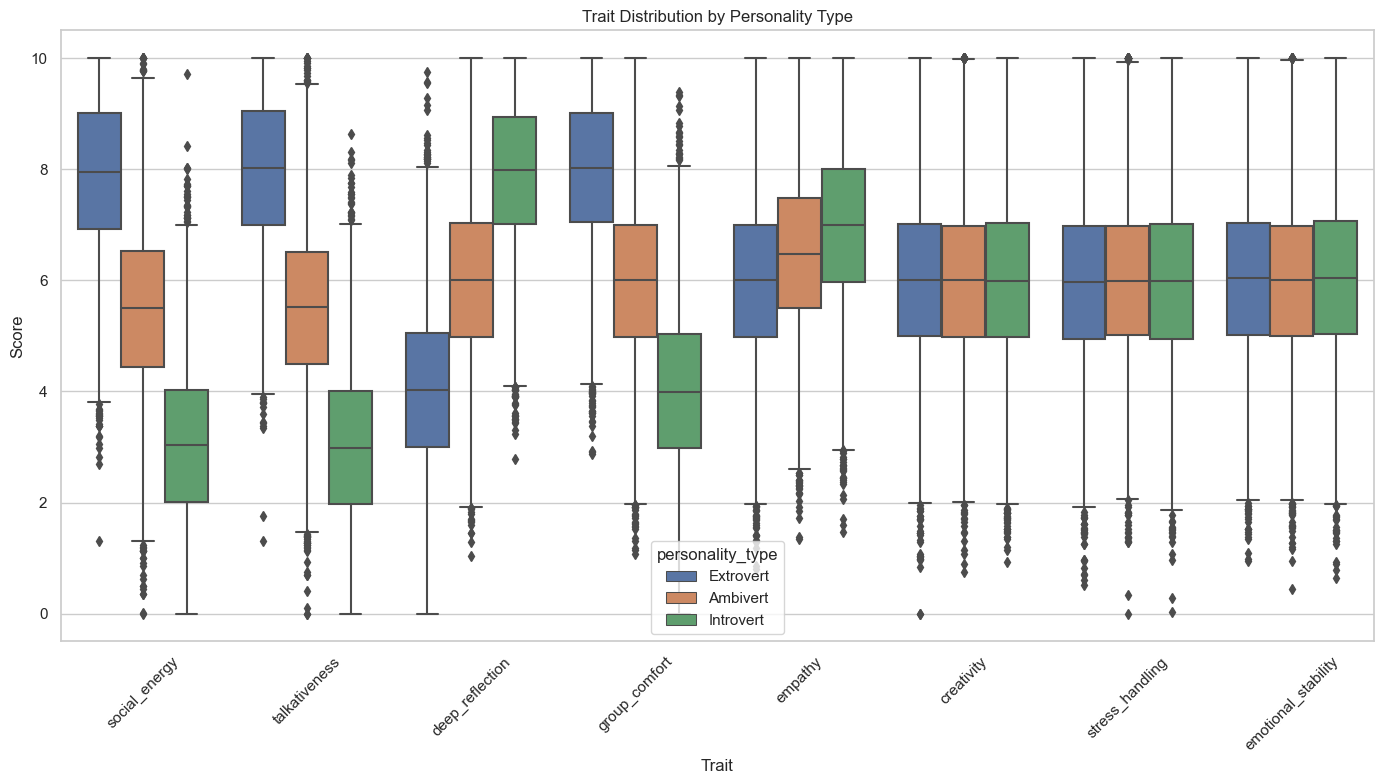

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

df = pd.read_csv("personality_synthetic_dataset.csv")

traits_to_plot = [
    'social_energy', 'talkativeness', 'deep_reflection', 
    'group_comfort', 'empathy', 'creativity', 'stress_handling', 'emotional_stability'
]

# need to use seaborn boxplot
df_melted = df.melt(id_vars='personality_type', value_vars=traits_to_plot, 
                    var_name='Trait', value_name='Score')

# different traits across 3 personality types
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x='Trait', y='Score', hue='personality_type')
plt.title('Trait Distribution by Personality Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

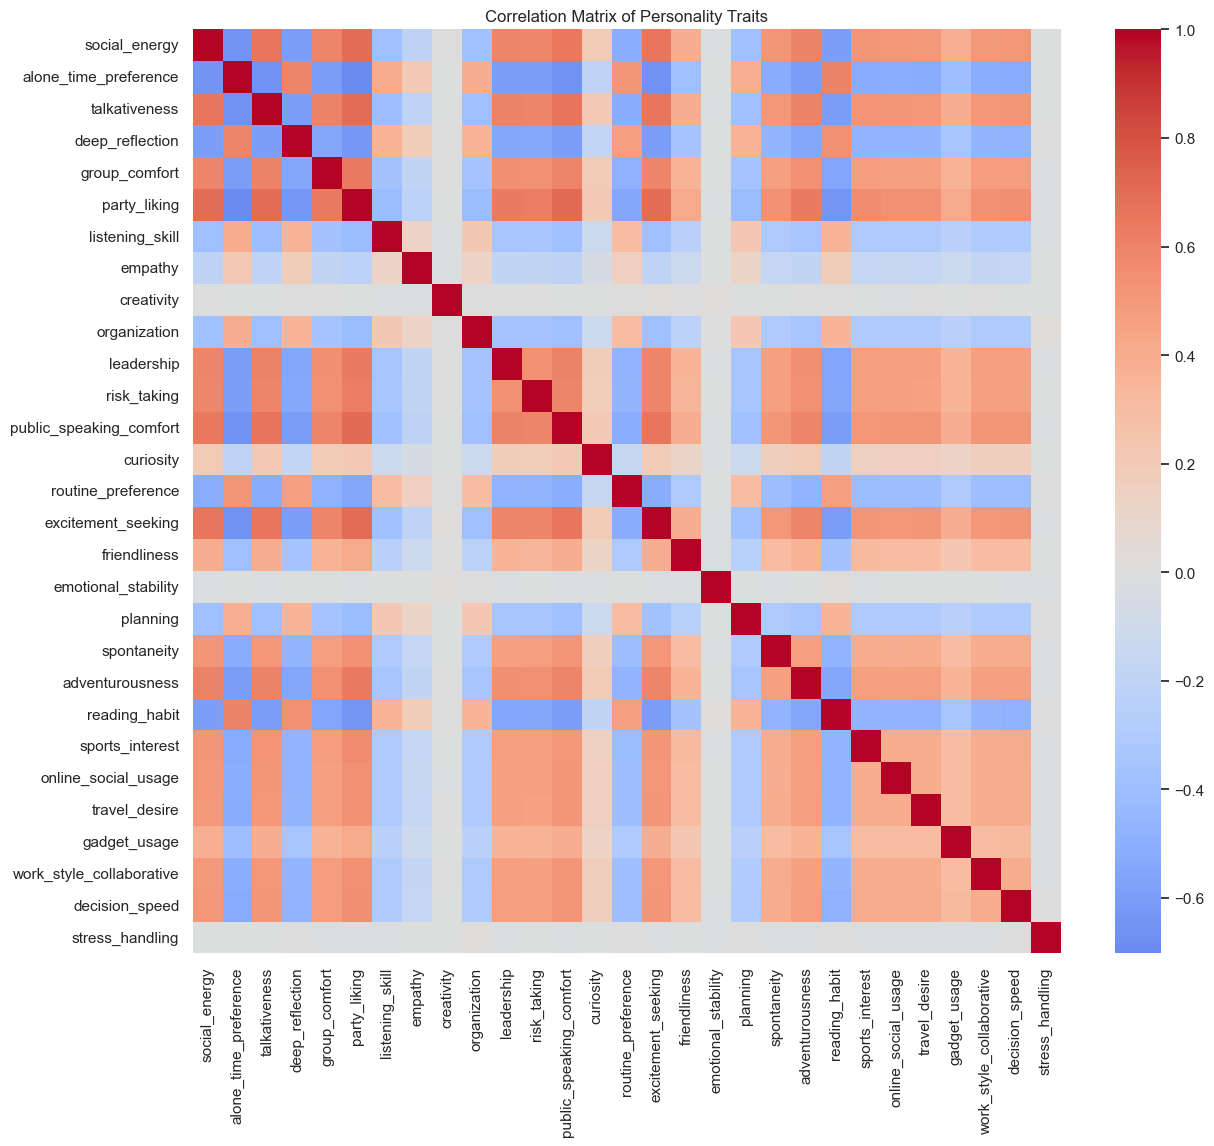

In [35]:
plt.figure(figsize=(14, 12))
corr = df.drop(columns=['personality_type', 'personality_encoded']).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Personality Traits')
plt.show()
# Those who like parties also seem to be comfortable speaking, talkative and adventerous and seek excitement.  All traits I would sterotypically put with extroverts.
#Traits of those who like alone time, deep reflection don't like parties.
# What surprised me is that creativity, stress handling,and emotioal stability were have 0 correlation.  Meaning,
#those features had little impact on personality type.  Most personalities determined by social preferences. 

In [32]:
#changing target to numeric
le = LabelEncoder()
df['personality_encoded'] = le.fit_transform(df['personality_type'])

X = df.drop(columns=['personality_type', 'personality_encoded'])
y = df['personality_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#random forest model
rf = randomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

    Ambivert       0.99      0.99      0.99      1261
   Extrovert       1.00      0.99      1.00      1426
   Introvert       1.00      1.00      1.00      1313

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



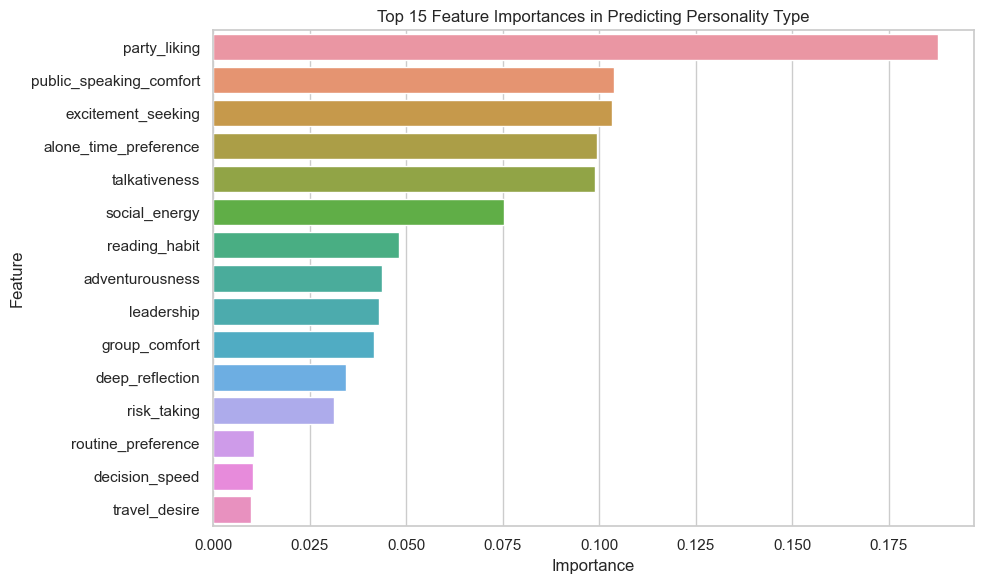

In [34]:
# feature importance
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# df
feature_importance_df = pd.DataFrame({
    'Feature': features[indices],
    'Importance': importances[indices]
})

# top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances in Predicting Personality Type')
plt.tight_layout()
plt.show()